In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Question 1

## Part A

In [2]:
%%latex
\begin{equation}
\text{The mean of the likelihood probability gives the best point estimate for the target variable given the explanatory variables}
\end{equation}
\begin{equation}
\text{and parameters. This is particularly useful for imputation and prediction, particularly in the absence of any prior}
\end{equation}
\begin{equation}
\text{on the distribution, since the mean gives a consistent, unbiased and efficient estimator consistent, unbiased and efficient}
\end{equation}
\begin{equation}
\text{estimator for any distribution. Further, it gives the lowest expectation value of MSE as follows,}
\end{equation}
\begin{align}
\operatorname{\mathbb{E}} \,\left( \left(Y - k\right)^2 \right)  & = \operatorname{\mathbb{E}} \,\left( \left(\left(Y - \mu_Y\right) + \left(\mu_Y - k\right)\right)^2 \right) \\
 & = \operatorname{\mathbb{E}} \,\left( \left(Y - \mu_Y\right)^2 + 2\left(Y - \mu_Y\right)\left(\mu_Y - k\right) + \left(\mu_Y - k\right)^2 \right) \\
 & = \sigma_Y^2 + \left(\mu_Y - k\right)^2
\end{align}
\begin{align}
\operatorname{\mathbb{E}}_{\min} \,\left( \left(Y - k\right)^2 \right)  & = \sigma_Y^2 \Leftrightarrow k = \mu_Y
\end{align}

<IPython.core.display.Latex object>

## Part B

In [3]:
%%latex
\begin{equation}
\text{The choice of σ, i.e. the variance parameter, is important as it indicates the error in the model, as it relates to the Gaussian noise}
\end{equation}
\begin{equation}
\text{in the data. Here, we consider that X has an extra row with an entry of value one to factor the intercept.}
\end{equation}
\begin{equation}
\text{It also affects the convergence of the model using gradient descent / ascent algorithms.}
\end{equation}
\begin{equation}
\begin{matrix} Y \sim \operatorname{\mathscr{N}}\left(\mu, \sigma^2\right), & \mu = X\cdot w\end{matrix}
\end{equation}
\begin{equation}
Y - w\cdot X \sim \operatorname{\mathscr{N}}\left(0, \sigma^2 \right)
\end{equation}
\begin{equation}
\text{From here, calculating the likelihood,}
\end{equation}
\begin{equation}
\operatorname{\mathscr{L}} \,\left( Y \mid X, w\right) = \prod_{i=1}^n \frac{e^{-\frac{(y_i - x_i \cdot w)^2}{2\sigma^2}}}{\sqrt{2\pi\sigma^2}}
\end{equation}
\begin{equation}
\text{From here, the log-likelihood is given as,}
\end{equation}
\begin{equation}
\operatorname{\mathscr{l}} =  -\frac{\sum^n_{i=1}\left(y_i - x_i \cdot w\right)^2}{2\sigma^2}- \frac{n}{2} \ln\left(2\pi\sigma^2\right)
\end{equation}
\begin{equation}
\text{This can then be maximised using gradient ascent. Its gradient relative to w is,}
\end{equation}
\begin{equation}
\nabla \operatorname{\mathscr{l}} =\cdot\frac{\sum^n_{i=1}  x_i^T\left(y_i - x_i \cdot w\right)}{\sigma^2}
\end{equation}

<IPython.core.display.Latex object>

In [4]:
train = pd.read_csv('Datasets/Weather History (Linear Regression).csv')
for col in train.columns :
    if col == 'Formatted Date' or col == 'Summary' or col == 'Precip Type' or col ==  'Daily Summary':
        train.drop(col, axis = 1, inplace = True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Temperature (C)           96453 non-null  float64
 1   Apparent Temperature (C)  96453 non-null  float64
 2   Humidity                  96453 non-null  float64
 3   Wind Speed (km/h)         96453 non-null  float64
 4   Wind Bearing (degrees)    96453 non-null  float64
 5   Visibility (km)           96453 non-null  float64
 6   Loud Cover                96453 non-null  float64
 7   Pressure (millibars)      96453 non-null  float64
dtypes: float64(8)
memory usage: 5.9 MB


In [5]:
X = train.copy(deep = True)
Y = train.copy(deep = True)
for col in train.columns :
    if col == 'Apparent Temperature (C)' :
        X.drop(col, axis = 1, inplace = True)
    else :
        Y.drop(col, axis = 1, inplace = True)
X.drop('Loud Cover', axis = 1, inplace = True)

mu = np.zeros((X.shape[1] + 1,1))
std = 1
alpha = 0.001
iterations = 100000

def linear_regression(X, Y, mu, sigma, iterations, alpha) :
    mean_x = np.empty(X.shape[1])
    std_x = np.empty(X.shape[1])
    i = 0
    j = 0
    for col in X.columns:
        mean_x[i]=np.mean(X[col])
        std_x[i] = np.std(X[col])
        i+=1
    for col in X.columns:
        col_del = X[col]
        col_del = (col_del - mean_x[j])/std_x[j]
        X[col] = col_del
        j+=1
    mean_y = np.empty(Y.shape[1])
    std_y = np.empty(Y.shape[1])
    i = 0
    j = 0
    for col in Y.columns:
        mean_y[i]=np.mean(Y[col])
        std_y[i] = np.std(Y[col])
        i+=1
    for col in Y.columns:
        col_del = Y[col]
        col_del = (col_del - mean_y[j])/std_y[j]
        Y[col] = col_del
        j+=1
    n = len(X)
    ones = np.ones(len(X))
    X['ones'] = ones
    Xt = X.to_numpy()
    Yt = Y.to_numpy()    
    w = mu
    for i in range(iterations) :
        w = w + alpha/n * (Xt.T @ (Yt - Xt@w))/sigma**2
    X.drop('ones', axis = 1, inplace = True)
    i = 0
    for cy in Y.columns :
        intercept_residual = mean_y[i]
        j = 0
        for cx in X.columns:
            if j == X.shape[1] :
                j += 1
                continue
            else :
                w[j][i]=w[j][i]*std_y[i]/std_x[j]
                intercept_residual += -mean_x[j]*w[j][i]
                j += 1
        w[X.shape[1]][i] *= std_y[i]
        w[X.shape[1]][i] += intercept_residual
        i += 1         
    return w

In [6]:
params = linear_regression(X, Y, mu, std, iterations, alpha)
print('The optimal parameters are :')
print(params)

The optimal parameters are :
[[ 1.12559725e+00]
 [ 1.03177793e+00]
 [-9.56567814e-02]
 [ 5.31492999e-04]
 [-8.15209127e-04]
 [ 2.00142626e-04]
 [-2.59251751e+00]]


## Part C

In [7]:
%%latex
\begin{equation}
\text{Similar to the previous linear regression, a generalised linear model assumes that Y depends on some function of X·w with}
\end{equation}
\begin{equation}
\text{some specified distribution from the exponential family (which includes many common distributions), a link function and}
\end{equation}
\begin{equation}
\text{a predictor. The weights themselves are determined by maximising the likehood (MLE estimation) or using a Bayesian prior}
\end{equation}
\begin{equation}
\text{(MAP estimation). One can develop a canonical GLM for a Poisson distribution as follows,}
\end{equation}
\begin{equation}
\begin{matrix} Y \sim \operatorname{Poisson}\left(\lambda\right), & \lambda = e^{X\cdot \beta}\end{matrix}
\end{equation}
\begin{equation}
\text{From here, calculating the likelihood,}
\end{equation}
\begin{equation}
\operatorname{\mathscr{L}} \,\left( Y \mid X, \beta\right) = \prod_{i=1}^n e^{-e^{x_i\cdot\beta}} \cdot\frac{e^{y_ix_i\cdot\beta}}{y_i!}
\end{equation}
\begin{equation}
\text{From here, the log-likelihood is given as,}
\end{equation}
\begin{equation}
\operatorname{\mathscr{l}} =  \sum^n_{i=1}\left(y_ix_i\cdot\beta - e^{x_i\cdot\beta} - \ln\left(y! \right)\right)
\end{equation}
\begin{equation}
\text{This can then be maximised using gradient ascent. Its gradient relative to β is,}
\end{equation}
\begin{equation}
\nabla \operatorname{\mathscr{l}} = \sum^n_{i = 1}x_i^T(y_i -  e^{x_i\cdot\beta})
\end{equation}

<IPython.core.display.Latex object>

In [8]:
train = pd.read_csv('Datasets/NYC Bicycle Counts (Poisson Regression).csv')
for col in train.columns :
    if col == 'Date' or col == 'Day' or col == 'Unnamed: 0' or col ==  'Daily Summary':
        train.drop(col, axis = 1, inplace = True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   High Temp (°F)       210 non-null    float64
 1   Low Temp (°F)        210 non-null    float64
 2   Precipitation        210 non-null    object 
 3   Brooklyn Bridge      210 non-null    float64
 4   Manhattan Bridge     210 non-null    int64  
 5   Williamsburg Bridge  210 non-null    float64
 6   Queensboro Bridge    210 non-null    float64
 7   Total                210 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 13.2+ KB


In [9]:
X = train.copy(deep = True)
Y = train.copy(deep = True)
for col in train.columns :
    if col == 'High Temp (°F)' or col == 'Low Temp (°F)' or  col == 'Precipitation':
        Y.drop(col, axis = 1, inplace = True)
    else :
        X.drop(col, axis = 1, inplace = True)
X['Precipitation'] = X['Precipitation'].map(lambda x : x.rstrip(' (S)')).replace('T', '0').astype(float)

alpha = 0.001
iterations = 100000

def poisson_regression(X, Y, iterations, alpha) :
    mu = np.zeros((X.shape[1],1))
    mean_x = np.empty(X.shape[1])
    std_x = np.empty(X.shape[1])
    i = 0
    j = 0
    for col in X.columns:
        mean_x[i]=np.mean(X[col])
        std_x[i] = np.std(X[col])
        i+=1
    for col in X.columns:
        col_del = X[col]
        col_del = (col_del - mean_x[j])/std_x[j]
        X[col] = col_del
        j+=1
    scale_y = np.empty(Y.shape[1])
    i = 0
    j = 0
    for col in Y.columns:
        scale_y[i] = np.std(Y[col])
        i += 1
    for col in Y.columns:
        col_del = Y[col]
        col_del = col_del/scale_y[j]
        Y[col] = col_del
        j+=1
    n = len(X)
    mu = np.zeros((X.shape[1] + 1,Y.shape[1]))
    ones = np.ones(n)
    X['ones'] = ones
    Xt = X.to_numpy()
    Yt = Y.to_numpy()
    w = mu
    for i in range(iterations) :
        w = w + alpha/n * (Xt.T @ (Yt - np.exp(Xt@w)))
    X.drop('ones', axis = 1, inplace = True)
    i = 0
    for cy in Y.columns :
        intercept_residual = np.log(scale_y[i])
        j = 0
        for cx in X.columns:
            if j == X.shape[1] :
                j += 1
                continue
            else :
                w[j][i] = w[j][i]/std_x[j]
                intercept_residual += -mean_x[j]*w[j][i]
                j += 1
        w[X.shape[1]][i] += intercept_residual
        i += 1
    return w

In [10]:
params = poisson_regression(X, Y, iterations, alpha)
print('The optimal parameters are as follows :')
print(params[:,0])
print(params[:,1])
print(params[:,2])
print(params[:,3])
print(params[:,4])

The optimal parameters are as follows :
[ 0.02877946 -0.00804597 -2.7674503   6.41582874]
[ 2.61190563e-02 -6.10145507e-03 -2.60865181e+00  7.06707605e+00]
[ 2.31629049e-02 -2.67671623e-03 -2.01861648e+00  7.25643640e+00]
[ 2.09896116e-02 -5.30222912e-03 -1.77808542e+00  7.14141535e+00]
[ 2.44262506e-02 -5.15370672e-03 -2.21842839e+00  8.39636597e+00]


# Question 2

In [11]:
train_A = pd.read_csv('Datasets/train_set_A.csv')
train_B = pd.read_csv('Datasets/train_set_B.csv')
train_C = pd.read_csv('Datasets/train_set_C.csv')
test_A = pd.read_csv('Datasets/test_set_A.csv')
test_B = pd.read_csv('Datasets/test_set_B.csv')
test_C = pd.read_csv('Datasets/test_set_C.csv')
train_A.info()
train_B.info()
train_C.info()
test_A.info()
test_B.info()
test_C.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x       100000 non-null  float64
 1   y       100000 non-null  float64
dtypes: float64(2)
memory usage: 1.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x       100000 non-null  float64
 1   y       100000 non-null  float64
dtypes: float64(2)
memory usage: 1.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x       100000 non-null  float64
 1   y       100000 non-null  float64
dtypes: float64(2)
memory usage: 1.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 co

In [12]:
from sklearn.linear_model import LinearRegression as linreg
linregA = linreg().fit(train_A['x'].values.reshape(-1,1), train_A['y'])
linregB = linreg().fit(train_B['x'].values.reshape(-1,1), train_B['y'])
linregC = linreg().fit(train_C['x'].values.reshape(-1,1), train_C['y'])
display(train_C['x'].values.reshape(-1,1))

array([[546.88915615],
       [797.89902128],
       [820.4018799 ],
       ...,
       [125.77389304],
       [436.97434321],
       [323.18838266]])

In [13]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as rs
y_AA_pred = linregA.predict(test_A['x'].values.reshape(-1,1))
print('The R2 score and MSE of A as the training dataset is ' + str(rs(y_AA_pred, test_A['y'])) + ' and ' + str(mse(y_AA_pred, test_A['y']))+  ', respectively, with A as the testing dataset')
y_AB_pred = linregA.predict(test_B['x'].values.reshape(-1,1))
print('The R2 score and MSE of A as the training dataset is ' + str(rs(y_AB_pred, test_B['y'])) + ' and ' + str(mse(y_AB_pred, test_B['y']))+  ', respectively, with B as the testing dataset')
y_AC_pred = linregA.predict(test_C['x'].values.reshape(-1,1))
print('The R2 score and MSE of A as the training dataset is ' + str(rs(y_AC_pred, test_C['y'])) + ' and ' + str(mse(y_AC_pred, test_C['y']))+  ', respectively, with C as the testing dataset')
y_BA_pred = linregB.predict(test_A['x'].values.reshape(-1,1))
print('The R2 score and MSE of B as the training dataset is ' + str(rs(y_BA_pred, test_A['y'])) + ' and ' + str(mse(y_BA_pred, test_A['y']))+  ', respectively, with A as the testing dataset')
y_BB_pred = linregB.predict(test_B['x'].values.reshape(-1,1))
print('The R2 score and MSE of B as the training dataset is ' + str(rs(y_BB_pred, test_B['y'])) + ' and ' + str(mse(y_BB_pred, test_B['y']))+  ', respectively, with B as the testing dataset')
y_BC_pred = linregB.predict(test_C['x'].values.reshape(-1,1))
print('The R2 score and MSE of B as the training dataset is ' + str(rs(y_BC_pred, test_C['y'])) + ' and ' + str(mse(y_BC_pred, test_C['y']))+  ', respectively, with C as the testing dataset')
y_CA_pred = linregC.predict(test_A['x'].values.reshape(-1,1))
print('The R2 score and MSE of C as the training dataset is ' + str(rs(y_CA_pred, test_A['y'])) + ' and ' + str(mse(y_CA_pred, test_A['y']))+  ', respectively, with A as the testing dataset')
y_CB_pred = linregC.predict(test_B['x'].values.reshape(-1,1))
print('The R2 score and MSE of C as the training dataset is ' + str(rs(y_CB_pred, test_B['y'])) + ' and ' + str(mse(y_CB_pred, test_B['y']))+  ', respectively, with B as the testing dataset')
y_CC_pred = linregC.predict(test_C['x'].values.reshape(-1,1))
print('The R2 score and MSE of C as the training dataset is ' + str(rs(y_CC_pred, test_C['y'])) + ' and ' + str(mse(y_CC_pred, test_C['y']))+  ', respectively, with C as the testing dataset')

The R2 score and MSE of A as the training dataset is 0.9999825266186544 and 22.25770734371432, respectively, with A as the testing dataset
The R2 score and MSE of A as the training dataset is 0.9999979889763616 and 2.5616550522774424, respectively, with B as the testing dataset
The R2 score and MSE of A as the training dataset is 0.9999999509680355 and 0.062457236803281115, respectively, with C as the testing dataset
The R2 score and MSE of B as the training dataset is 0.9999743036053634 and 32.73219379378818, respectively, with A as the testing dataset
The R2 score and MSE of B as the training dataset is 1.0 and 1.9577195262268569e-25, respectively, with B as the testing dataset
The R2 score and MSE of B as the training dataset is 0.999997947816513 and 2.6140814129669656, respectively, with C as the testing dataset
The R2 score and MSE of C as the training dataset is 0.9999873162659758 and 16.156746682235898, respectively, with A as the testing dataset
The R2 score and MSE of C as the

From here, it can the pair of B as both the training and testing dataset is the actual distribution (R2 score approximately one and very negligible MSE compared to the other values). However, all the test and train test datasets are very close to this actual distribution which can be inferred from their R2 scores being very close to one.


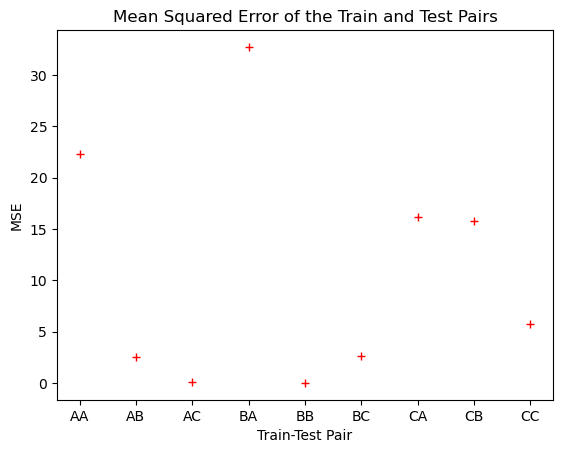

In [14]:
print('From here, it can the pair of B as both the training and testing dataset is the actual distribution (R2 score approximately one and very negligible MSE compared to the other values). However, all the test and train test datasets are very close to this actual distribution which can be inferred from their R2 scores being very close to one.')
x_axis = ['AA', 'AB', 'AC', 'BA', 'BB', 'BC', 'CA', 'CB', 'CC']
y_axis = [mse(y_AA_pred, test_A['y']), mse(y_AB_pred, test_B['y']), mse(y_AC_pred, test_C['y']), mse(y_BA_pred, test_A['y']), mse(y_BB_pred, test_B['y']), mse(y_BC_pred, test_C['y']), mse(y_CA_pred, test_A['y']), mse(y_CB_pred, test_B['y']), mse(y_CC_pred, test_C['y'])]
plt.plot(x_axis, y_axis, 'r+', linestyle = 'None')
plt.title("Mean Squared Error of the Train and Test Pairs")
plt.xlabel("Train-Test Pair")
plt.ylabel("MSE")
plt.show()

# Question 3

In [15]:
train = pd.read_csv('Datasets/Social Network Ads (Logistic Regression).csv')
train.drop('User ID', axis = 1, inplace = True)
train.drop('Gender', axis = 1, inplace = True)
train.info
mean = np.empty(train.shape[1] - 1)
std = np.empty(train.shape[1] - 1)
i = 0
j = 0
for col in train.columns:
    if col == 'Purchased' :
        continue
    else :
        mean[i]=np.mean(train[col])
        std[i] = np.std(train[col])
        i+=1
for col in train.columns:
    if col == 'Purchased' :
        continue
    else :
        col_del = train[col]
        col_del = (col_del - mean[j])/std[j]
        train[col] = col_del
        j+=1

In [16]:
params = np.array([[0], [0], [0]])
alphab = 0.001
iterationsb = 100000
Yb = train.copy(deep = True)
Xb = train.copy(deep = True)
ones = np.ones(len(train))
for col in train.columns :
    if col == 'Purchased' :
        Xb.drop(col, axis = 1, inplace = True)
    else :
        Yb.drop(col, axis = 1, inplace = True)
Xb['ones'] = ones

def sigmoid(x) :
    return 1/(1 + np.exp(-x))
def cost_fun(X,Y,params) :
    n = len(X)
    Z = sigmoid(X @ params)
    cost = (1/n) * (-(Y).T@np.log(Z)-(1-Y).T@np.log(1 - Z))
    return cost
def batch_grad_desc(X, Y, params, alpha, iterations) :
    n = len(X)
    cost = np.zeros(iterations)
    for i in range(iterations) :
        params = params - alpha/n * (X.T @ (sigmoid(X@params) - Y))
        cost[i] = cost_fun(X,Y,params)
    return (cost, params)

Xf = Xb.copy(deep = True)
Yf = Yb.copy(deep = True)
iterationsf = 100
def Fischer_scoring (X, Y, params, iterations) :
    n = len(X)
    cost = np.zeros(iterations)
    h = sigmoid(X @ params)
    P = h @ (np.ones_like(h) - h).T
    W = np.matrix(np.diag(P[:, 0]))
    I = X.T @ W @ X
    U = X.T @ (Y - h)
    for i in range(iterations) :
        params = params + I.I @ U
        h = sigmoid(X @ params)
        P = h @ (np.ones_like(h) - h).T
        W = np.matrix(np.diag(np.ravel(P[:,0])))
        I = X.T @ W @ X
        U = X.T @ (Y - h)
        cost[i] = cost_fun(X,Y,params)
    return (cost, params)

Xt = Xb.copy(deep = True)
Yt = Yb.copy(deep = True)
Xt.drop('ones', axis = 1, inplace = True)
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(penalty = 'none')  

The initial cost is :  0.6931471805599453
The optimal parameters through batch gradient descent are [2.378407606179591 1.190412077373626 -1.1125580455623822]
The optimal parameters through Fischer scoring are [2.4436974536826996 1.222071507282907 -1.1380460094357805]
The optimal parameters as per sklearn are [2.4445793893237693 1.222581754975078 -1.1381223693272149]


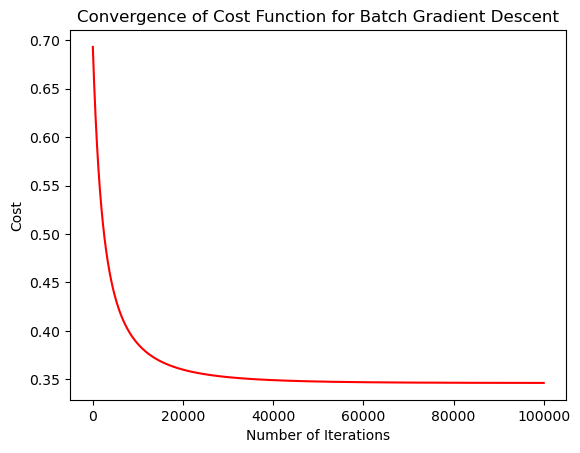

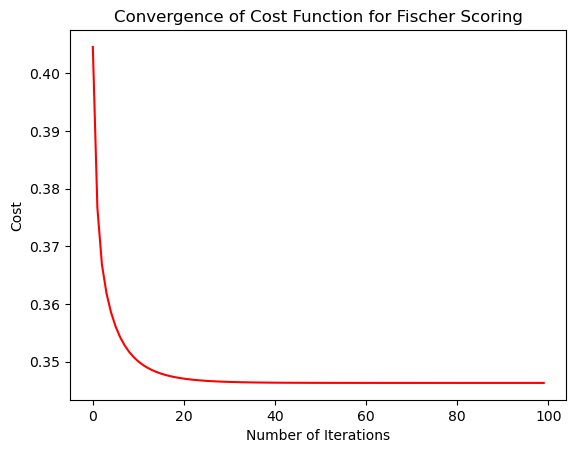

One can infer that batch gradient descent has a slower convergence than Fischer scoring, since the former took 1000 times more iterations, however, computationally, both have the same time complexity of O(kn^2) where k is the number of iterations and n the number of samples.


In [17]:
initial_cost = cost_fun(Xb.to_numpy(), Yb.to_numpy(), params)
print('The initial cost is : ', float(initial_cost))
(costb, paramsb) = batch_grad_desc(Xb.to_numpy(), Yb.to_numpy(), params, alphab, iterationsb)
print("The optimal parameters through batch gradient descent are [" + str(float(paramsb[0][0])) + " " + str(float(paramsb[1][0])) + " " + str(float(paramsb[2][0])) + "]")
(costf, paramsf) = Fischer_scoring(Xf.to_numpy(), Yf.to_numpy(), params, iterationsf)
print("The optimal parameters through Fischer scoring are [" + str(float(paramsf[0][0])) + " " + str(float(paramsf[1][0])) + " " + str(float(paramsf[2][0])) + "]")
LR.fit(Xt,Yt.values.ravel())
print("The optimal parameters as per sklearn are [" + str(LR.coef_[0][0]) + " " + str(LR.coef_[0][1]) + " " + str(float(LR.intercept_)) + "]")
plt.figure()
plt.plot(range(len(costb)), costb, 'r')
plt.title("Convergence of Cost Function for Batch Gradient Descent")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()
plt.figure()
plt.plot(range(len(costf)), costf, 'r')
plt.title("Convergence of Cost Function for Fischer Scoring")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()
print("One can infer that batch gradient descent has a slower convergence than Fischer scoring, since the former took 1000 times more iterations, however, computationally, both have the same time complexity of O(kn^2) where k is the number of iterations and n the number of samples.")

# Question 4

In [18]:
%%latex
\begin{equation}
\text{For the first case, both types of models will converge. Depending on the data, however, the inflexible model may underfit}
\end{equation}
\begin{equation}
\text{while the flexible model may overfit based on the bias-variance tradeoff. It is better suited to use the inflexible models.}
\end{equation}
\begin{equation}
\text{For instance, with a linear trend in the data, if one uses an inflexible model like linear regression, that would capture the}
\end{equation}
\begin{equation}
\text{distribution well, while a flexible model like splines would lead to overfitting}
\end{equation}
\begin{equation}
\end{equation}
\begin{equation}
\text{In the second case, while both models have a lower chance of convergence due to less data (underfitting side,}
\end{equation}
\begin{equation}
\text{in the bias-variance tradeoff), the inflexible model will perform better. Here, the inflexible model could weakly}
\end{equation}
\begin{equation}
\text{capture the trend, while the flexible model would still be trying to converge}
\end{equation}
\begin{equation}
\end{equation}
\begin{equation}
\text{For the last part, it is expected that the flexible model would perform better than the inflexible model, since the flexible model}
\end{equation}
\begin{equation}
\text{will be able to capture more of the non-linear relationship. In terms of the bias-variance tradeoff, it is expected that the inflexible}
\end{equation}
\begin{equation}
\text{model will be underfitting while the other one could give an optimal fit. This can be understood by assuming an exponential relation}
\end{equation}
\begin{equation}
\text{between the independent and dependent variables. While an inflexible model, like say linear regression, will capture the general}
\end{equation}
\begin{equation}
\text{trend, it will have higher error while a flexible model, like say polynomial regression will capture the distribution better.}
\end{equation}

<IPython.core.display.Latex object>